In [21]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg, interpolate, io

Execute the following command in order to confirm that you have added Dynare++ to your path correctly, and that it is fully funtional. N.B.: The `!` tells IPython to send to command to your OS shell. Yes, you can run shell commands from within IPython!).

In [2]:
# confirm the Dynare++ is installed correctly!
!C:\\dynare\\4.4.3\\dynare++\\dynare++

usage: dynare++ [--help] [--version] [options] <model file>

    --help               print this message and return
    --version            print version and return

options:
    --per <num>          number of periods simulated after burnt [100]
    --burn <num>         number of periods burnt [0]
    --sim <num>          number of simulations [80]
    --rtper <num>        number of RT periods simulated after burnt [0]
    --rtsim <num>        number of RT simulations [0]
    --condper <num>      number of periods in cond. simulations [0]
    --condsim <num>      number of conditional simulations [0]
    --steps <num>        steps towards stoch. SS [0=deter.]
    --centralize         centralize the rule [do centralize]
    --no-centralize      do not centralize the rule [do centralize]
    --prefix <string>    prefix of variables in Mat-4 file ["dyn"]
    --seed <num>         random number generator seed [934098]
    --order <num>        order of approximation [no default]
    --threa

If everything is functioning correctly, then you should have been presented with a long list of command lines options for `dynare++`.

# Neoclassical "growth" model with inelastic labor supply:
We are going to start by analying the stochastic optimal growth model with in-elastic labor supply (i.e., a stochastic Ramsey model).  The file 

    'ramsey_benchmark.mod'

contains the model. Execute the code in the cell below to solve for a first-order approximation (`--order=1`) of the model around a deterministic steady state (`--no-centralize`).  By default, if the --no-centralize option is not given, then Dynare++ computes the fixed point of the approximated policy functions. This fixed point is called the stochastic fix point: it is the point where agents will want to stay if current shocks are zero, but knowing that future shocks have a non-zero variance.  Then Dynare++ rewrites the expression of the approximated decision rule, in order to express it in terms of deviation from the stochastic fix point, instead of deviations from the deterministic steady state.

In [3]:
# dont't forget the ! 
!C:\\dynare\\4.4.3\\dynare++\\dynare++ --order=1 seed=42 --no-centralize ramsey_benchmark.mod

When the program is 
finished, it produces two output 
files: a journal 
file 



    `ramsey_benchmark.jnl` 



and a Matlab/Octave MAT-4 file



    `ramsey_benchmark.mat`. 



The journal 
file contains information about time, memory and processor resources needed for all steps of solution. The output fi
le is more interesting. It contains various simulation results.  The solution output can be loaded into a Python `dict` (i.e., dictionary) object using the `scipy.io` module as follows.

In [4]:
# can use scipy.io to load the .mat file containing the solution output
ramsey_order1 = sio.loadmat('ramsey_benchmark.mat')

In [5]:
# the data is now accessbile via the following keys
ramsey_order1.keys()

['dyn_ss',
 'dyn_vcov',
 'dyn_i_eps',
 'dyn_i_k',
 'dyn_i_i',
 'dyn_i_c',
 'dyn_nboth',
 'dyn_nstat',
 'dyn_i_y',
 'dyn_i_w',
 'dyn_vcov_exo',
 '__version__',
 'dyn_i_r',
 'dyn_vars',
 'dyn_i_z',
 'dyn_steady_states',
 'dyn_irfm_eps_var',
 'dyn_irfm_eps_mean',
 'dyn_state_vars',
 'dyn_g_1',
 'dyn_g_0',
 'dyn_mean',
 'dyn_irfp_eps_mean',
 'dyn_irfp_eps_var',
 'dyn_npred',
 'dyn_nforw',
 '__header__',
 '__globals__',
 'dyn_shocks']

In [6]:
# go ahead and compute up to 5th order approximations around the deterministic steady state
!C:\\dynare\\4.4.3\\dynare++\\dynare++ --order=2 --no-centralize ramsey_benchmark.mod
ramsey_order2 = sio.loadmat('ramsey_benchmark.mat')

!C:\\dynare\\4.4.3\\dynare++\\dynare++ --order=3 --no-centralize ramsey_benchmark.mod
ramsey_order3 = sio.loadmat('ramsey_benchmark.mat')

!C:\\dynare\\4.4.3\\dynare++\\dynare++ --order=4 --no-centralize ramsey_benchmark.mod
ramsey_order4 = sio.loadmat('ramsey_benchmark.mat')

!C:\\dynare\\4.4.3\\dynare++\\dynare++ --order=5 --no-centralize ramsey_benchmark.mod
ramsey_order5 = sio.loadmat('ramsey_benchmark.mat')

### Checking the steady state values

The steady state values for the endogenous variables are stored in `dyn_ss` and `dyn_steady_states`. The ordering of the endogenous variables is given by `dyn_vars`.

In [7]:
ramsey_order1['dyn_vars']

array([u'y', u'i', u'w', u'k', u'z', u'c', u'r'], 
      dtype='<U1')

In [8]:
ramsey_order1['dyn_ss']

array([[  5.60926882e+00],
       [  1.46056774e+00],
       [  3.36556129e+00],
       [  7.45187624e+01],
       [  2.41863436e-28],
       [  4.14870107e+00],
       [  1.05092967e-02]])

In [9]:
ramsey_order1['dyn_steady_states']

array([[  5.60926882e+00],
       [  1.46056774e+00],
       [  3.36556129e+00],
       [  7.45187624e+01],
       [  2.41863436e-28],
       [  4.14870107e+00],
       [  1.05092967e-02]])

In [10]:
# extract the steady state values
y_bar, i_bar, w_bar, k_bar, z_bar, c_bar, r_bar = ramsey_order1['dyn_ss']

The mean and covariance are stored in `dyn_mean` and `dyn_vcov`. 

In [11]:
ramsey_order1['dyn_mean']

array([[  5.37873055e+00],
       [  1.35218264e+00],
       [  3.22723833e+00],
       [  7.11889040e+01],
       [ -2.34616746e-02],
       [  4.02654791e+00],
       [  1.05994770e-02]])

In [12]:
ramsey_order1['dyn_vcov']

array([[  3.40878312e+00,   1.95682559e+00,   2.04526987e+00,
          3.31097095e+01,   4.37140669e-01,   1.45195753e+00,
          5.45862056e-03],
       [  1.95682559e+00,   1.21240003e+00,   1.17409536e+00,
          1.49514966e+01,   2.73632980e-01,   7.44425565e-01,
          4.84154024e-03],
       [  2.04526987e+00,   1.17409536e+00,   1.22716192e+00,
          1.98658257e+01,   2.62284401e-01,   8.71174517e-01,
          3.27517234e-03],
       [  3.31097095e+01,   1.49514966e+01,   1.98658257e+01,
          5.06215132e+02,   3.21296701e+00,   1.81582129e+01,
         -2.47377978e-02],
       [  4.37140669e-01,   2.73632980e-01,   2.62284401e-01,
          3.21296701e+00,   6.18387345e-02,   1.63507689e-01,
          1.13509244e-03],
       [  1.45195753e+00,   7.44425565e-01,   8.71174517e-01,
          1.81582129e+01,   1.63507689e-01,   7.07531963e-01,
          6.17080324e-04],
       [  5.45862056e-03,   4.84154024e-03,   3.27517234e-03,
         -2.47377978e-02,   1.13

In [13]:
def policy_function(data, X):
    return data['dyn_g_0'] + np.dot(X, data['dyn_g_1'])   

### Computing and plotting the policy functions

In [14]:
from math import factorial

In [33]:
#def policy_function(model, prefix='dyn', order=None):
#    """First attempt at writing a callable policy function."""
#    return model[prefix + '_g_0'] + (1 / factorial(1)) * np.dot(model[prefix + '_g_1'], 

In [16]:
#policy_function(ramsey_order1)

In [17]:
ramsey_order1['dyn_state_vars']

array([u'k  ', u'z  ', u'eps'], 
      dtype='<U3')

In [18]:
ramsey_order1['dyn_g_1']

array([[  3.01092967e-02,   5.32880538e+00,   5.60926882e+00],
       [  2.12646782e-03,   4.10575580e+00,   4.32184821e+00],
       [  1.80655780e-02,   3.19728323e+00,   3.36556129e+00],
       [  9.82526468e-01,   4.10575580e+00,   4.32184821e+00],
       [  0.00000000e+00,   9.50000000e-01,   1.00000000e+00],
       [  2.79828289e-02,   1.22304958e+00,   1.28742061e+00],
       [ -2.42429925e-04,   2.86038319e-02,   3.01092967e-02]])

The impulse response functions are stored in matrices as follows

All shocks sizes are one standard error. Rows of the matrices correspond to endogenous variables, columns correspond to periods. Thus capital response to a positive shock to `eps` can be plotted as

In [19]:
ramsey_order1['dyn_vars']

array([u'y', u'i', u'w', u'k', u'z', u'c', u'r'], 
      dtype='<U1')

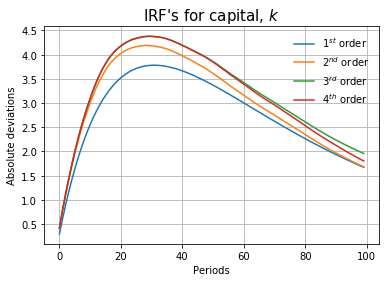

In [22]:
# irfs for capital
plt.plot(ramsey_order1['dyn_irfp_eps_mean'][3,:], label='$1^{st}$ order')
plt.plot(ramsey_order2['dyn_irfp_eps_mean'][3,:], label='$2^{nd}$ order')
plt.plot(ramsey_order3['dyn_irfp_eps_mean'][3,:], label='$3^{rd}$ order')
plt.plot(ramsey_order4['dyn_irfp_eps_mean'][3,:], label='$4^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('Absolute deviations')
plt.title("IRF's for capital, $k$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

The data is in units of the respective variables, so in order to plot the capital response in percentage changes from the decision rule's 






x point (which is a vector `dyn_ss`), one has to issue the commands:

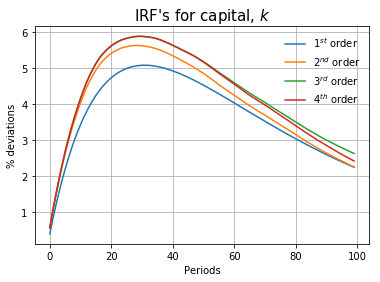

In [23]:
# irfs for capital
plt.plot(100 * ramsey_order1['dyn_irfp_eps_mean'][3,:] / k_bar, label='$1^{st}$ order')
plt.plot(100 * ramsey_order2['dyn_irfp_eps_mean'][3,:] / k_bar, label='$2^{nd}$ order')
plt.plot(100 * ramsey_order3['dyn_irfp_eps_mean'][3,:] / k_bar, label='$3^{rd}$ order')
plt.plot(100 * ramsey_order4['dyn_irfp_eps_mean'][3,:] / k_bar, label='$4^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for capital, $k$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

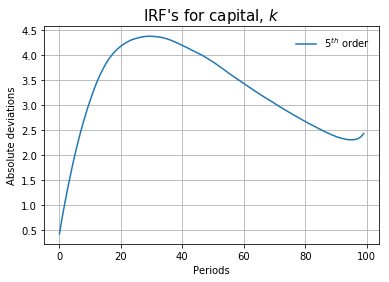

In [24]:
# instability of high order approximations...even for a simple model!
plt.plot(ramsey_order5['dyn_irfp_eps_mean'][3,:], label='$5^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('Absolute deviations')
plt.title("IRF's for capital, $k$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

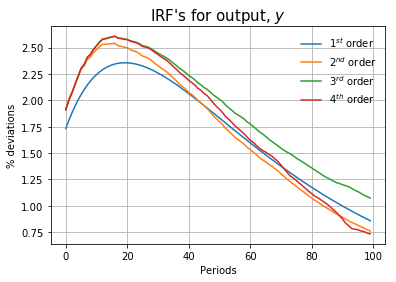

In [25]:
# irfs for output
plt.plot(100 * ramsey_order1['dyn_irfp_eps_mean'][5,:] / y_bar, label='$1^{st}$ order')
plt.plot(100 * ramsey_order2['dyn_irfp_eps_mean'][5,:] / y_bar, label='$2^{nd}$ order')
plt.plot(100 * ramsey_order3['dyn_irfp_eps_mean'][5,:] / y_bar, label='$3^{rd}$ order')
plt.plot(100 * ramsey_order4['dyn_irfp_eps_mean'][5,:] / y_bar, label='$4^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for output, $y$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

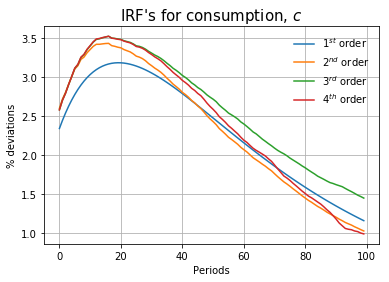

In [26]:
# irfs for consumption
plt.plot(100 * ramsey_order1['dyn_irfp_eps_mean'][5,:] / c_bar, label='$1^{st}$ order')
plt.plot(100 * ramsey_order2['dyn_irfp_eps_mean'][5,:] / c_bar, label='$2^{nd}$ order')
plt.plot(100 * ramsey_order3['dyn_irfp_eps_mean'][5,:] / c_bar, label='$3^{rd}$ order')
plt.plot(100 * ramsey_order4['dyn_irfp_eps_mean'][5,:] / c_bar, label='$4^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for consumption, $c$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

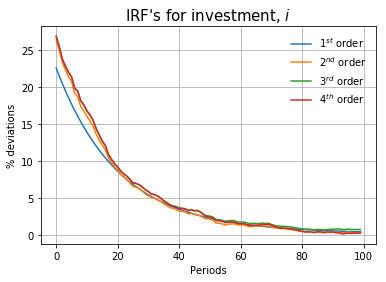

In [27]:
# irfs for investment
plt.plot(100 * ramsey_order1['dyn_irfp_eps_mean'][1,:] / i_bar, label='$1^{st}$ order')
plt.plot(100 * ramsey_order2['dyn_irfp_eps_mean'][1,:] / i_bar, label='$2^{nd}$ order')
plt.plot(100 * ramsey_order3['dyn_irfp_eps_mean'][1,:] / i_bar, label='$3^{rd}$ order')
plt.plot(100 * ramsey_order4['dyn_irfp_eps_mean'][1,:] / i_bar, label='$4^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for investment, $i$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

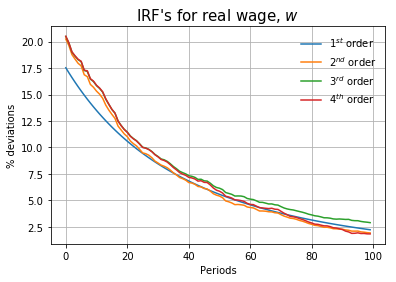

In [28]:
# irfs for real wage
plt.plot(100 * ramsey_order1['dyn_irfp_eps_mean'][2,:] / i_bar, label='$1^{st}$ order')
plt.plot(100 * ramsey_order2['dyn_irfp_eps_mean'][2,:] / i_bar, label='$2^{nd}$ order')
plt.plot(100 * ramsey_order3['dyn_irfp_eps_mean'][2,:] / i_bar, label='$3^{rd}$ order')
plt.plot(100 * ramsey_order4['dyn_irfp_eps_mean'][2,:] / i_bar, label='$4^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for real wage, $w$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

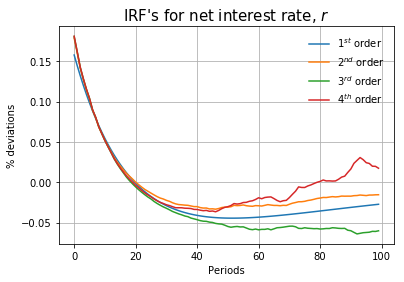

In [29]:
# irfs for net interest rate
plt.plot(100 * ramsey_order1['dyn_irfp_eps_mean'][6,:] / i_bar, label='$1^{st}$ order')
plt.plot(100 * ramsey_order2['dyn_irfp_eps_mean'][6,:] / i_bar, label='$2^{nd}$ order')
plt.plot(100 * ramsey_order3['dyn_irfp_eps_mean'][6,:] / i_bar, label='$3^{rd}$ order')
plt.plot(100 * ramsey_order4['dyn_irfp_eps_mean'][6,:] / i_bar, label='$4^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for net interest rate, $r$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

# Neoclassical "growth" model with elastic labor supply:
The next model we will look at is a an extension of the Ramsey benchmark to incorporate a labor/leisure choice.

In [30]:
# dont't forget the ! 
!dynare++ --order=1 --no-centralize --seed=42 rbc_benchmark.mod
rbc_order1 = sio.loadmat('rbc_benchmark.mat')

In [31]:
# go ahead and compute up to 5th order approximations around the deterministic steady state
!dynare++ --order=2 --no-centralize --seed=42 rbc_benchmark.mod
rbc_order2 = sio.loadmat('rbc_benchmark.mat')

!dynare++ --order=3 --no-centralize --seed=42 rbc_benchmark.mod
rbc_order3 = sio.loadmat('rbc_benchmark.mat')

!dynare++ --order=4 --no-centralize --seed=42 rbc_benchmark.mod
rbc_order4 = sio.loadmat('rbc_benchmark.mat')

!dynare++ --order=5 --no-centralize --seed=42 rbc_benchmark.mod
rbc_order5 = sio.loadmat('rbc_benchmark.mat')

In [35]:
rbc_order1['dyn_vars']

array([u'y', u'i', u'w', u'k', u'z', u'c', u'r', u'l'], 
      dtype='<U1')

In [36]:
rbc_order1['dyn_ss']

array([[  1.74188611e+00],
       [  4.53560480e-01],
       [  3.36556129e+00],
       [  2.31408408e+01],
       [  2.13871122e-17],
       [  1.28832562e+00],
       [  1.05092967e-02],
       [  3.10537106e-01]])

In [37]:
# deterministic steady state values do not depend on the order of approximation
y_bar, i_bar, w_bar, k_bar, z_bar, c_bar, r_bar, l_bar = rbc_order1['dyn_ss'] 

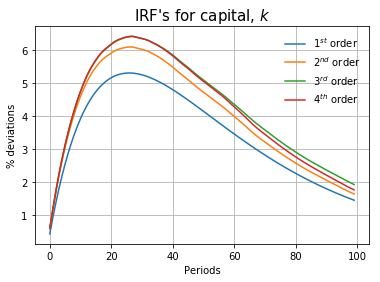

In [38]:
# irfs for capital
plt.plot(100 * rbc_order1['dyn_irfp_eps_mean'][3,:] / k_bar, label='$1^{st}$ order')
plt.plot(100 * rbc_order2['dyn_irfp_eps_mean'][3,:] / k_bar, label='$2^{nd}$ order')
plt.plot(100 * rbc_order3['dyn_irfp_eps_mean'][3,:] / k_bar, label='$3^{rd}$ order')
plt.plot(100 * rbc_order4['dyn_irfp_eps_mean'][3,:] / k_bar, label='$4^{th}$ order')
#plt.plot(100 * rbc_order5['dyn_irfp_eps_mean'][3,:] / k_bar, label='$5^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for capital, $k$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

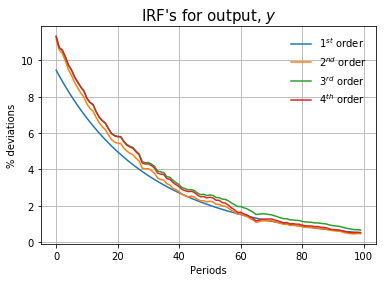

In [39]:
# irfs for output
plt.plot(100 * rbc_order1['dyn_irfp_eps_mean'][0,:] / y_bar, label='$1^{st}$ order')
plt.plot(100 * rbc_order2['dyn_irfp_eps_mean'][0,:] / y_bar, label='$2^{nd}$ order')
plt.plot(100 * rbc_order3['dyn_irfp_eps_mean'][0,:] / y_bar, label='$3^{rd}$ order')
plt.plot(100 * rbc_order4['dyn_irfp_eps_mean'][0,:] / y_bar, label='$4^{th}$ order')
#plt.plot(100 * rbc_order5['dyn_irfp_eps_mean'][0,:] / y_bar, label='$5^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for output, $y$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

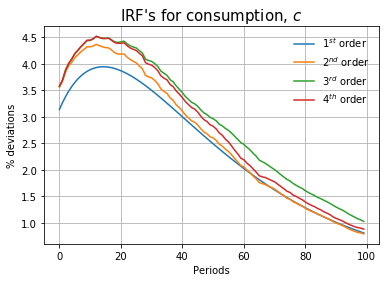

In [40]:
# irfs for consumption
plt.plot(100 * rbc_order1['dyn_irfp_eps_mean'][5,:] / c_bar, label='$1^{st}$ order')
plt.plot(100 * rbc_order2['dyn_irfp_eps_mean'][5,:] / c_bar, label='$2^{nd}$ order')
plt.plot(100 * rbc_order3['dyn_irfp_eps_mean'][5,:] / c_bar, label='$3^{rd}$ order')
plt.plot(100 * rbc_order4['dyn_irfp_eps_mean'][5,:] / c_bar, label='$4^{th}$ order')
#plt.plot(100 * rbc_order5['dyn_irfp_eps_mean'][5,:] / c_bar, label='$5^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for consumption, $c$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

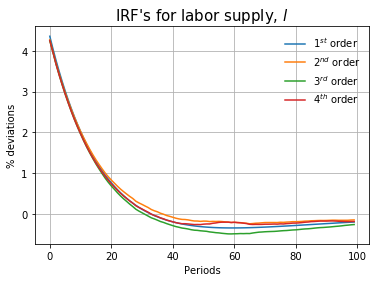

In [41]:
# irfs for labor supply
plt.plot(100 * rbc_order1['dyn_irfp_eps_mean'][7,:] / l_bar, label='$1^{st}$ order')
plt.plot(100 * rbc_order2['dyn_irfp_eps_mean'][7,:] / l_bar, label='$2^{nd}$ order')
plt.plot(100 * rbc_order3['dyn_irfp_eps_mean'][7,:] / l_bar, label='$3^{rd}$ order')
plt.plot(100 * rbc_order4['dyn_irfp_eps_mean'][7,:] / l_bar, label='$4^{th}$ order')
#plt.plot(100 * rbc_order5['dyn_irfp_eps_mean'][7,:] / l_bar, label='$5^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for labor supply, $l$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

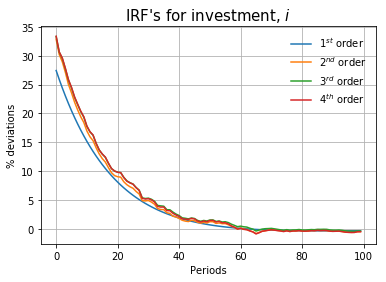

In [42]:
# irfs for investment
plt.plot(100 * rbc_order1['dyn_irfp_eps_mean'][1,:] / i_bar, label='$1^{st}$ order')
plt.plot(100 * rbc_order2['dyn_irfp_eps_mean'][1,:] / i_bar, label='$2^{nd}$ order')
plt.plot(100 * rbc_order3['dyn_irfp_eps_mean'][1,:] / i_bar, label='$3^{rd}$ order')
plt.plot(100 * rbc_order4['dyn_irfp_eps_mean'][1,:] / i_bar, label='$4^{th}$ order')
#plt.plot(100 * rbc_order5['dyn_irfp_eps_mean'][1,:] / i_bar, label='$5^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for investment, $i$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

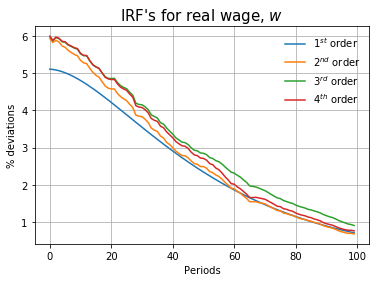

In [43]:
# irfs for real wage
plt.plot(100 * rbc_order1['dyn_irfp_eps_mean'][2,:] / w_bar, label='$1^{st}$ order')
plt.plot(100 * rbc_order2['dyn_irfp_eps_mean'][2,:] / w_bar, label='$2^{nd}$ order')
plt.plot(100 * rbc_order3['dyn_irfp_eps_mean'][2,:] / w_bar, label='$3^{rd}$ order')
plt.plot(100 * rbc_order4['dyn_irfp_eps_mean'][2,:] / w_bar, label='$4^{th}$ order')
#plt.plot(100 * rbc_order5['dyn_irfp_eps_mean'][2,:] / w_bar, label='$5^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for real wage, $w$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

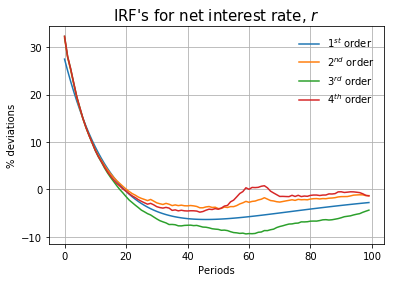

In [44]:
# irfs for net interest rate
plt.plot(100 * rbc_order1['dyn_irfp_eps_mean'][6,:] / r_bar, label='$1^{st}$ order')
plt.plot(100 * rbc_order2['dyn_irfp_eps_mean'][6,:] / r_bar, label='$2^{nd}$ order')
plt.plot(100 * rbc_order3['dyn_irfp_eps_mean'][6,:] / r_bar, label='$3^{rd}$ order')
plt.plot(100 * rbc_order4['dyn_irfp_eps_mean'][6,:] / r_bar, label='$4^{th}$ order')
#plt.plot(100 * rbc_order5['dyn_irfp_eps_mean'][6,:] / r_bar, label='$5^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for net interest rate, $r$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

# Extending the above models to incorporate actual growth

## Inelastic labor supply 

In [46]:
# go ahead and compute up to 5th order approximations around the deterministic steady state
!dynare++ --order=1 --no-centralize --seed=42 ramsey_growth.mod
ramsey_growth_order1 = sio.loadmat('ramsey_growth.mat')

!dynare++ --order=2 --no-centralize --seed=42 ramsey_growth.mod
ramsey_growth_order2 = sio.loadmat('ramsey_growth.mat')

!dynare++ --order=3 --no-centralize --seed=42 ramsey_growth.mod
ramsey_growth_order3 = sio.loadmat('ramsey_growth.mat')

!dynare++ --order=4 --no-centralize --seed=42 ramsey_growth.mod
ramsey_growth_order4 = sio.loadmat('ramsey_growth.mat')

!dynare++ --order=5 --no-centralize --seed=42 ramsey_growth.mod
ramsey_growth_order5 = sio.loadmat('ramsey_growth.mat')

In [47]:
ramsey_growth_order1['dyn_vars']

array([u'y     ', u'i     ', u'check1', u'k     ', u'z     ', u'c     '], 
      dtype='<U6')

In [48]:
ramsey_growth_order1['dyn_ss']

array([[  4.92821268],
       [  1.43266508],
       [  0.        ],
       [ 54.29263443],
       [  1.        ],
       [  3.4955476 ]])

In [49]:
# deterministic steady state values do not depend on the order of approximation
y_bar, i_bar, check1_bar, k_bar, z_bar, c_bar = ramsey_growth_order1['dyn_ss'] 

In [50]:
ramsey_growth_order1['dyn_g_1']

array([[  3.63085176e-02,   9.85642536e-02,  -1.97128507e+00],
       [  4.81450763e-03,   1.02328231e+00,   8.01989486e-01],
       [ -6.94346620e-18,  -2.04275926e-16,   4.44089210e-16],
       [  9.78426673e-01,   3.66628078e+00,  -5.20579799e+01],
       [  0.00000000e+00,   9.50000000e-01,   1.00000000e+00],
       [  3.14940100e-02,  -9.24718061e-01,  -2.77327456e+00]])

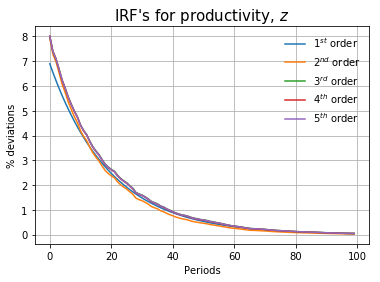

In [51]:
# irfs for productivity
plt.plot(100 * ramsey_growth_order1['dyn_irfp_eps_mean'][4,:] / z_bar, label='$1^{st}$ order')
plt.plot(100 * ramsey_growth_order2['dyn_irfp_eps_mean'][4,:] / z_bar, label='$2^{nd}$ order')
plt.plot(100 * ramsey_growth_order3['dyn_irfp_eps_mean'][4,:] / z_bar, label='$3^{rd}$ order')
plt.plot(100 * ramsey_growth_order4['dyn_irfp_eps_mean'][4,:] / z_bar, label='$4^{th}$ order')
plt.plot(100 * ramsey_growth_order5['dyn_irfp_eps_mean'][4,:] / z_bar, label='$5^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for productivity, $z$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

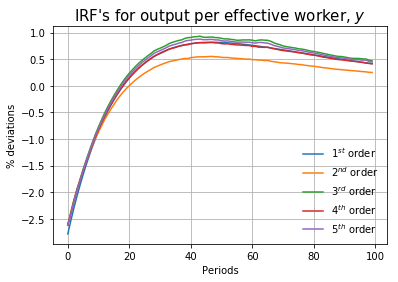

In [52]:
# irfs for output per effective worker
plt.plot(100 * ramsey_growth_order1['dyn_irfp_eps_mean'][0,:] / y_bar, label='$1^{st}$ order')
plt.plot(100 * ramsey_growth_order2['dyn_irfp_eps_mean'][0,:] / y_bar, label='$2^{nd}$ order')
plt.plot(100 * ramsey_growth_order3['dyn_irfp_eps_mean'][0,:] / y_bar, label='$3^{rd}$ order')
plt.plot(100 * ramsey_growth_order4['dyn_irfp_eps_mean'][0,:] / y_bar, label='$4^{th}$ order')
plt.plot(100 * ramsey_growth_order5['dyn_irfp_eps_mean'][0,:] / y_bar, label='$5^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for output per effective worker, $y$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

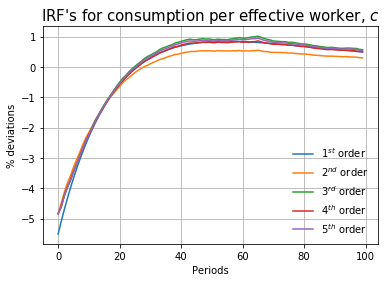

In [53]:
# irfs for consumption per effective worker
plt.plot(100 * ramsey_growth_order1['dyn_irfp_eps_mean'][5,:] / c_bar, label='$1^{st}$ order')
plt.plot(100 * ramsey_growth_order2['dyn_irfp_eps_mean'][5,:] / c_bar, label='$2^{nd}$ order')
plt.plot(100 * ramsey_growth_order3['dyn_irfp_eps_mean'][5,:] / c_bar, label='$3^{rd}$ order')
plt.plot(100 * ramsey_growth_order4['dyn_irfp_eps_mean'][5,:] / c_bar, label='$4^{th}$ order')
plt.plot(100 * ramsey_growth_order5['dyn_irfp_eps_mean'][5,:] / c_bar, label='$5^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for consumption per effective worker, $c$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

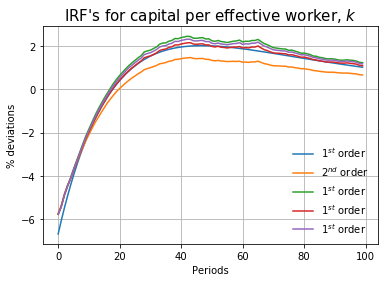

In [54]:
# irfs for capital per effective worker
plt.plot(100 * ramsey_growth_order1['dyn_irfp_eps_mean'][3,:] / k_bar, label='$1^{st}$ order')
plt.plot(100 * ramsey_growth_order2['dyn_irfp_eps_mean'][3,:] / k_bar, label='$2^{nd}$ order')
plt.plot(100 * ramsey_growth_order3['dyn_irfp_eps_mean'][3,:] / k_bar, label='$1^{st}$ order')
plt.plot(100 * ramsey_growth_order4['dyn_irfp_eps_mean'][3,:] / k_bar, label='$1^{st}$ order')
plt.plot(100 * ramsey_growth_order5['dyn_irfp_eps_mean'][3,:] / k_bar, label='$1^{st}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for capital per effective worker, $k$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

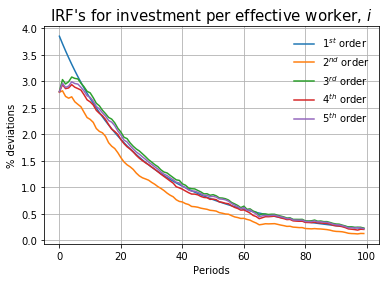

In [55]:
# irfs for investment per effective worker
plt.plot(100 * ramsey_growth_order1['dyn_irfp_eps_mean'][1,:] / i_bar, label='$1^{st}$ order')
plt.plot(100 * ramsey_growth_order2['dyn_irfp_eps_mean'][1,:] / i_bar, label='$2^{nd}$ order')
plt.plot(100 * ramsey_growth_order3['dyn_irfp_eps_mean'][1,:] / i_bar, label='$3^{rd}$ order')
plt.plot(100 * ramsey_growth_order4['dyn_irfp_eps_mean'][1,:] / i_bar, label='$4^{th}$ order')
plt.plot(100 * ramsey_growth_order5['dyn_irfp_eps_mean'][1,:] / i_bar, label='$5^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for investment per effective worker, $i$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

## Elastic labor supply

# Fun with parameters
Can download the Penn World Tables data and use the data to play around with different parameter values for the models.

In [56]:
def get_SolowResiduals(rgdppc, rgdppw, g0, delta, alpha, h=10, **kwargs):
    """Computes Solow residuals!

    Required arguments:

        rgdppc: Must specify a valid measure of real gdp per capita. 
                Valid options are rgdpl, rgdpl2, rgdpch. See Penn World 
                Tables documentation for definitions of these variables.
        rgdppw: Must specify a valid measure of real gdp per worker. 
                Valid options are rgdpwok, rgdpl2wok, rgdpl2pe, rgdpl2te. 
                See Penn World Tables documentation for definitions of 
                these variables.
        g0:     Initial guess for the growth rate of technology. 
                Required in order to pin down an initial estimate of the 
                capital stock.
        delta:  Estimated rate of capital decpreciation rate. Required in 
                order to compute the capital stock. 
        alpha:  Estimated share of income/output going to capital. Required 
                in order to decompose the growth rates in order to impute A 
                and g.
        h:      Must specify the amount of smoothing to be applied to 
                computed growth rates (i.e., those of labor force, 
                investment share, and technology). 

    Optional keyword arguments:

        path:    Valid file path to a local copy of the PWT data.
        version: Valid version number for the specific version of PWT data you
                 wish to download. See the PWT website for details.
        date:    Date stamp for version of PWT data you wish to download. Format
                 is '11302012' for 30 Nov. 2012.
        extract: Whether or not to extract the contents of the zip file into your
                 working directory. Default is True.

    """
        
    # optional keywords args
    path    = kwargs.get('path', None)
    version = kwargs.get('version', 71)
    date    = kwargs.get('date', '11302012')
    extract = kwargs.get('extract', True)
        
    # first check for a local copy of PWT
    if path != None:
        pwt = pd.read_csv(path, index_col=['year', 'isocode'])

    # otherwise, download the appropriate zip file 
    elif path == None:
        url = 'http://pwt.econ.upenn.edu/Downloads/pwt' + \
              str(version) + '/pwt' + str(version) +'_' + date + \
              'version.zip' 
        archive = zipfile.ZipFile(StringIO(urlopen(url).read()), 'r') 

        # to extract or not to extract...
        tmp_file = 'pwt' + str(version) + '_wo_country_names_wo_g_vars.csv'
        if extract == True:
            archive.extractall()
            pwt = pd.read_csv(tmp_file, index_col=['year', 'isocode'])
        else:
            pwt = archive.read(tmp_file)
            pwt = pd.read_csv(StringIO(pwt), index_col=['year', 'isocode'])         
    
    # convert to Pandas Panel object
    pwt = pwt.to_panel()
    
    # to compute Solow residuals need to a measure of real GDP...
    pwt['realGDP'] = pwt[rgdppc] * pwt.POP
    
    # ...and a measure of labor force growth rates 
    pwt['laborForce'] = (pwt[rgdppc] / pwt[rgdppw]) * pwt.POP
    pwt['laborForceGrowth'] = pwt.laborForce.pct_change() 

    # annual growth rates are noisy, smooth them! Note backshift!
    tmp_data = pd.rolling_mean(pwt.laborForceGrowth, 
                               window=10, min_periods=h).shift(-h)
    pwt['smoothedLaborForceGrowth'] = tmp_data
    
    # convert ki to proportion
    pwt['investmentShare'] = pwt.ki / 100.
    
    # investment shares are also noisy, smooth them! Note backshift!
    tmp_data = pd.rolling_mean(pwt.investmentShare, window=10, 
                               min_periods=h).shift(-h)
    pwt['smoothedInvestmentShare'] = tmp_data
    
    # initial data on imputed K is just made up of K0 (and junk!)
    break_even_s = (1 + pwt.smoothedLaborForceGrowth) * (1 + g0) - (1 - delta)
    actual_s = pwt.smoothedInvestmentShare 
    pwt['imputedK'] = pwt.realGDP * (actual_s / break_even_s)
    
    # impute capital stock for each country
    for ctry, value in pwt.imputedK.iteritems():
        for year in pwt.imputedK.index[:-1]: # no data beyond 2010
            if np.isnan(value.ix[year]) == False:
                k = pwt.imputedK[ctry].ix[year]
                s = pwt.investmentShare[ctry].ix[year]
                y = pwt.realGDP[ctry].ix[year]
                k_plus = (1 - delta) * k + s * y
                pwt.imputedK[ctry].ix[year + 1] = k_plus
            else:
                pass
            
    # create capital-output ratio
    pwt['capitalOutputRatio'] = pwt.imputedK / pwt.realGDP
    
    # compute the implied level of technology
    pwt['technology'] = pwt[rgdppw] / (pwt.capitalOutputRatio**(alpha / (1 - alpha)))
    
    # finally, compute the growth in technology
    pwt['technologyGrowth'] = pwt['technology'].pct_change()

    # technology growth rate are also noisy, smooth them! Note backshift!
    tmp_data = pd.rolling_mean(pwt.technologyGrowth, window=10, 
                               min_periods=h).shift(-h)
    pwt['smoothedTechnologyGrowth'] = tmp_data
    
    return pwt

In [57]:
# dont't forget the ! 
!dynare++ --order=1 seed=42 --no-centralize ramsey_fixed_wages.mod

In [58]:
# can use scipy.io to load the .mat file containing the solution output
ramseyFixedWages_order1 = sio.loadmat('ramsey_fixed_wages.mat')

In [59]:
# go ahead and compute up to 5th order approximations around the deterministic steady state
!dynare++ --order=2 seed=42 --no-centralize ramsey_fixed_wages.mod
ramseyFixedWages_order2 = sio.loadmat('ramsey_fixed_wages.mat')

!dynare++ --order=3 seed=42 --no-centralize ramsey_fixed_wages.mod
ramseyFixedWages_order3 = sio.loadmat('ramsey_fixed_wages.mat')

!dynare++ --order=4 seed=42 --no-centralize ramsey_fixed_wages.mod
ramseyFixedWages_order4 = sio.loadmat('ramsey_fixed_wages.mat')

!dynare++ --order=5 seed=42 --no-centralize ramsey_fixed_wages.mod
ramseyFixedWages_order5 = sio.loadmat('ramsey_fixed_wages.mat')

In [60]:
ramsey_order1['dyn_vars']

array([u'y', u'i', u'w', u'k', u'z', u'c', u'r'], 
      dtype='<U1')

In [61]:
ramseyFixedWages_order1['dyn_ss']

array([[  2.07495643e-01],
       [  1.16389884e+00],
       [  3.03061443e-01],
       [  1.54623185e+01],
       [  1.52092025e-27],
       [  8.60837395e-01],
       [  1.05092967e-02]])

In [62]:
ramsey_order1['dyn_ss']

array([[  5.60926882e+00],
       [  1.46056774e+00],
       [  3.36556129e+00],
       [  7.45187624e+01],
       [  2.41863436e-28],
       [  4.14870107e+00],
       [  1.05092967e-02]])

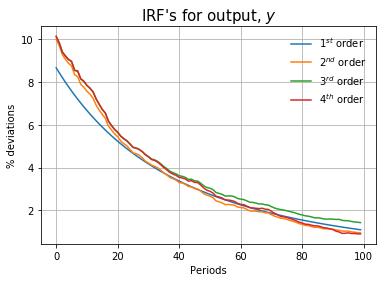

In [63]:
# irfs for output
plt.plot(100 * ramsey_order1['dyn_irfp_eps_mean'][0,:] / y_bar, label='$1^{st}$ order')
plt.plot(100 * ramsey_order2['dyn_irfp_eps_mean'][0,:] / y_bar, label='$2^{nd}$ order')
plt.plot(100 * ramsey_order3['dyn_irfp_eps_mean'][0,:] / y_bar, label='$3^{rd}$ order')
plt.plot(100 * ramsey_order4['dyn_irfp_eps_mean'][0,:] / y_bar, label='$4^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for output, $y$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

In [64]:
# extract the steady state values
l_bar1, y_bar1, i_bar1, k_bar1, z_bar1, c_bar1, r_bar1 = ramseyFixedWages_order1['dyn_ss']

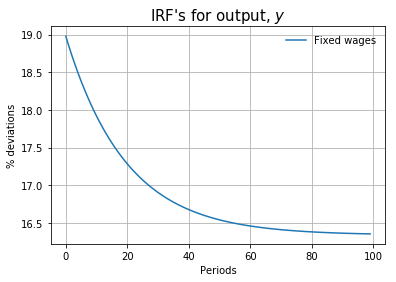

In [65]:
# irfs for output
plt.plot(100 * ramseyFixedWages_order1['dyn_irfp_eps_mean'][1,:] / y_bar1, label='Fixed wages')
#plt.plot(100 * ramsey_order1['dyn_irfm_eps_mean'][0,:] / y_bar, label='Flexible wages')
#plt.plot(100 * ramseyFixedWages_order2['dyn_irfp_eps_mean'][1,:] / y_bar1, label='$2^{nd}$ order')
#plt.plot(100 * ramseyFixedWages_order3['dyn_irfp_eps_mean'][1,:] / y_bar1, label='$3^{rd}$ order')
#plt.plot(100 * ramseyFixedWages_order4['dyn_irfp_eps_mean'][1,:] / y_bar1, label='$4^{th}$ order')

plt.xlabel('Periods')
plt.ylabel('% deviations')
plt.title("IRF's for output, $y$", fontsize=15)
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

In [66]:
(1 - 0.4) * (y_bar1 / l_bar1)

array([ 3.36556129])

In [67]:
(1 - 0.4) * ((0.4 * 0.9896) / (1 - 0.9896 * (1 - 0.0196)))**(0.4 / (1 - 0.4))

3.3655612901369123